# Прогноз заболеваний сердца с помощью машинного обучения

Этот ноутбук создат с помощью библиотек для ДС и МЛ для языка Питон для попытки создания модели машинного обучения, 
способной спрогнозировать заболевания сердца пациентов на основе медицинских показателей.

Будем использовать следующий подход:
1. Определим задачу
2. Рассмотрим наши данные (датасет)
3. Определим метрики
4. Определим наиболее важные входные данные
5. Построим модель
6. Проведем эксперименты

## 1. Определим задачу

Для утверждения
> Для данных медцинских показателей для пацинтов можем ли мы спрогнозировать, есть ли у них заболевания сердца?

## 2. Датасет

Датасет подготовлен организацией UCI и его можно найти по адресу https://archive.ics.uci.edu/ml/datasets/heart+Disease

Также есть на Kaggle https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Метрики

>  Если мы сможем достичь 95% точности при прогнозировании наличия у пациента болезни сердца во время проверки подхода, мы осуществим этот проект

## 4. Параметры (входные данные)

Здесь мы будем смотреть что значит тот или иной столбец в нашем датасете

**Создадим словарь для нашего датасета**
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
    * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Подготовим наши инструменты

Будем использовать pandas, Matplotlib и NumPy для работы с данными и анализа данных. 

In [1]:
# Импорт нужных инструментов

# Типичные библиотеки для анализа данных и построяния графиков
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# наши графифи будут строится внутри ноутбука
%matplotlib inline  

# Модели из бибилотеки Scikit-Learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Метрики
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Загрузка датасета

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape # строки, столбцы

(303, 14)

## Анализ данных

Цель ознакомиться с данными в датасете 

1. На какой(ие) вопросы мы хотим ответить?
2. Какие данные у нас есть, какого типа и как с ними будем работать?
3. Каких данные нет и как с пропусками работать?
4. Есть ли выбросы и что с ними делать?
5. Как можно добавить, удалить или изменить данные для того, чтобы как можно больше получить информации от данных?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Узнаем количество пациентов с заболеваниями сердца и без
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

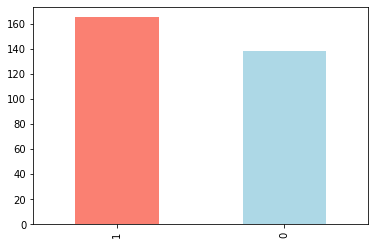

In [6]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Есть ли пропущенные данные?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Зависимость заболеваний сердца от пола пациента

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Сравним столбец target и sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


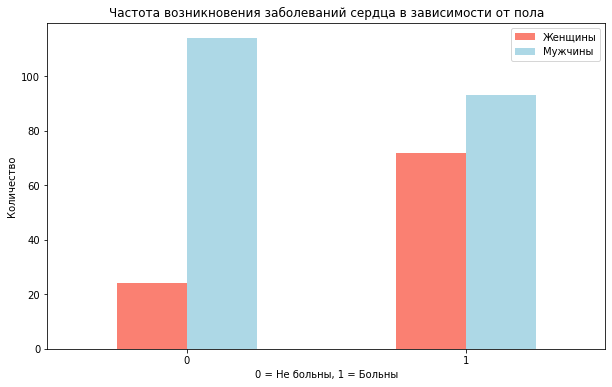

In [12]:
# Нарисуем график
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"]);
plt.title("Частота возникновения заболеваний сердца в зависимости от пола")
plt.xlabel("0 = Не больны, 1 = Больны")
plt.ylabel("Количество")
plt.legend(["Женщины", "Мужчины"])
plt.xticks(rotation=0);

### Зависимость заболеваний сердца от возраста и частоты пульса

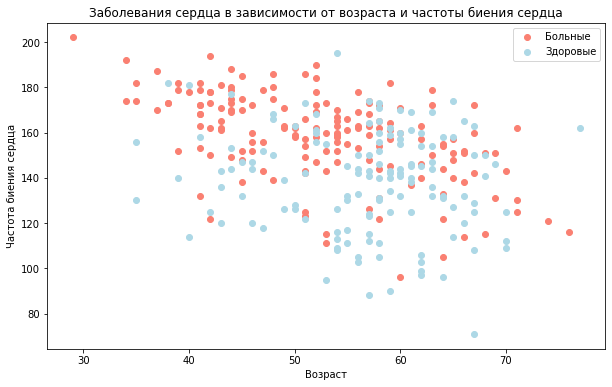

In [13]:
# Создадим новый рисунок
plt.figure(figsize=(10, 6))

# Точечный график для заболевших
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon")
# Точечный график для неболеющих сердечными заболеваниями пациентов
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Добавим подписи
plt.title("Заболевания сердца в зависимости от возраста и частоты биения сердца")
plt.xlabel("Возраст")
plt.ylabel("Частота биения сердца")
plt.legend(["Больные", "Здоровые"]);

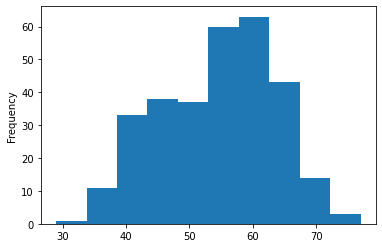

In [14]:
# Проверим распеределение возраста посредством гистограмы
df.age.plot.hist();

### Частота заболеваний сердца в зависимости от болей в груди

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


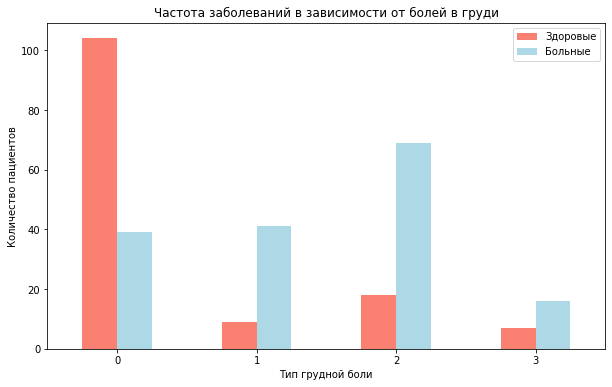

In [16]:
# Сделаем таблицу более наглядной
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])

# Добавим обозначения
plt.title("Частота заболеваний в зависимости от болей в груди")
plt.xlabel("Тип грудной боли")
plt.ylabel("Количество пациентов")
plt.legend(["Здоровые", "Больные"])
plt.xticks(rotation=0);

In [17]:
# Создадим матрицу корреляций
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


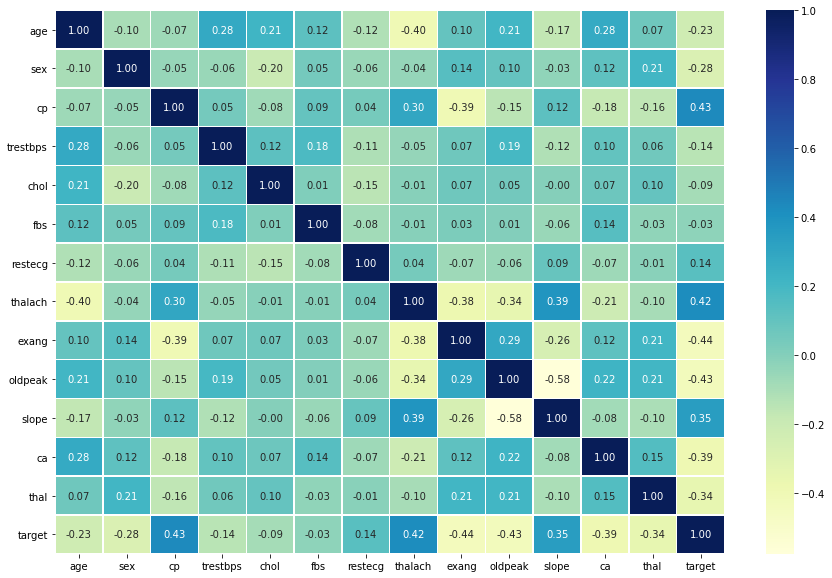

In [18]:
# Визуализируем матрицу для более наглядного представления
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
# bottom, top =ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Создание модели

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Разделим данные на X и y
X = df.drop("target", axis=1)

y = df.target

In [21]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# Раделим данные на две выборки тренировочную и тестовую
# Установим сид для повторяемости
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [25]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Теперь у нас данные разделены на тренировочную и тестовую выборку, теперь построим модель машинного обучения. 
Мы ее обучим(найдем закономероности) на тренировочной выборке.
И используем найденные закомерности на тестовой выборке.
Согласно карте: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Выберем 3 модели:
1. Логистическая регрессия
2. Модель ближайших соседей K-nearest Neighbours Classfier
3. Модель случайный лес Random Forest Classifier

In [26]:
# Создадим словарь с моделями
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
           "Random Forest": RandomForestClassifier()
          }

# Создадим функцию для обучения и оценки моделей
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Обучает и оценивает данные модели машинного обучения.
    models : словарь с различными моделями машинного обучения из библиотеки Scikit-Learn
    X_train : Тренировочная выборка (без цели)
    X_test : Тестовая выбора (без цели)
    y_train : Тренировочная цель
    y_test : Тестовая цель
    """
    # Назначим seed
    np.random.seed(42)
    # Создадим словарь для оценок моделей
    model_scores = {}
    # Создадим цикл для моделей
    for name, model in models.items():
        # Обучим модели на тренировочной выборке
        model.fit(X_train, y_train)
        # Оценим модель и добавим результаты к model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [27]:
models_score = fit_and_score(models=models, 
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

models_score

C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

##  Сравнение моделей

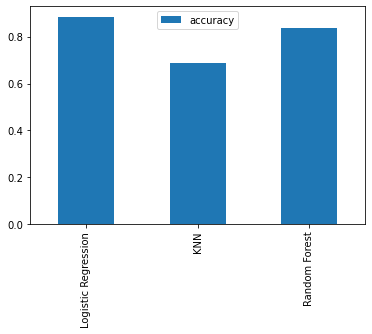

In [28]:
model_compare = pd.DataFrame(models_score, index=["accuracy"])
model_compare.T.plot.bar()

Теперь у нас есть базовая модель. И мы знаем ее точность и теперь мы знаем, что зачастую мы не должны основываться наших первых прогнозах.  
Давайте попробуем сделать следующее:
* Попробуем настроить гиперпараметры
* Найдем важность наших параметров (Х)
* Посмотрим матрицу ошибок
* Используем кросс-валидацию
* Точность (Precison) Доля правильных объектов, названных классификатором положительными и при этом действительно являющимися положительными P=TP/(TP+FP)
* Полнота (Recall). Показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм
* F-мера (F1 score)
* Отчет о классификации (Cassification report)
* ROC кривая (ROC curve)
* Площадь под кривой (AUC)

### Настройка гиперпараметров

In [29]:
# Настроим модель KNN

train_scores =[]
test_scores = []

# Создадим список различных значений для параметра n-neighbors
neighbors = range (1, 21)

# Инициируем модель
knn = KNeighborsClassifier()

# Создадим цикл для n-neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Обучим модель
    knn.fit(X_train, y_train)
    
    # Обновим список train_scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Обновим список test_scores
    test_scores.append(knn.score(X_test, y_test))
    


In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Наибольшая точность модели KNN на тестовой выборке:75.41%


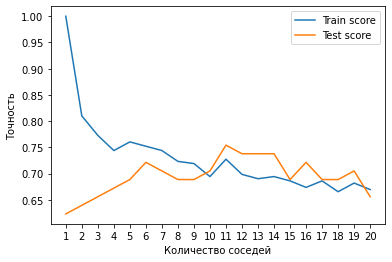

In [32]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21, 1))
plt.xlabel("Количество соседей")
plt.ylabel("Точность")
plt.legend()

print(f"Наибольшая точность модели KNN на тестовой выборке:{max(test_scores)*100:.2f}%")

## Подбор гиперпараметров моделей при помощи RandomizedSearchCV

Будем подбирать параметры для:
* Логистической регрессии
* Случайного леса
при помощи RandomizedSearchCV

In [83]:
# Создадим сетку гиперпараметров для Логистической регрессии
log_reg_grid = {"C": np.arange(0.21, 0.233, 0.001),
                "solver": ["liblinear"]}

# Создадим сетку гиперпараметров для Случайного леса
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [82]:
np.arange(0.2, 0.3, 0.001)
len(np.arange(0.21, 0.233, 0.001))

24

Теперь когда мы выбрали гиперпараметры, теперь настроим их при помощи RandomizedSearchCV

In [84]:
# Настроим Логистрическую регрессию

np.random.seed(42)

# Настройка поиска гиперпараметров для Логистической регрессии
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5, 
                                n_iter=20,
                                verbose=True)

# Обучим модель Логистической Регресиии нашими случайными гиперпараметрами
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([0.21 , 0.211, 0.212, 0.213, 0.214, 0.215, 0.216, 0.217, 0.218,
       0.219, 0.22 , 0.221, 0.222, 0.223, 0.224, 0.225, 0.226, 0.227,
       0.228, 0.229, 0.23 , 0.231, 0.232, 0.233]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [85]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.218}

In [86]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Теперь после настройки Логистической регрессии настроим гиперпараметры Случайного леса

In [37]:
# Настроим seed
np.random.seed(42)

# Настройка поиска гиперпараметров для Случайного леса
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Обучим модель Случайного леса нашими случайными гиперпараметрами
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
# Выведем лучше гиперпараметры
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
np.arange(2, 20, 2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [40]:
#  Оценим случайный поиск гиперпараметров для Случайного леса
rs_rf.score(X_test, y_test)

0.8688524590163934

In [41]:
models_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Настроим гиперпараметры, используя GridSearchCV

Так как Логистическая Регрессия предоставила бОльшую точность, попытаемся ее настроить с помощью GridSearch_CV

In [87]:
# Различные гиперпараметры для Логистичской регрессии
log_reg_grid = {"C": np.arange(0.2, 0.224, 0.001),
                "solver": ['newton-cg', 'lbfgs', 'liblinear']
                }
# Настройка поиска гиперпараметров для Логистической регрессии
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# Обучим Логистическую регрессию, используя гиперпараметры
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentat

C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [88]:
# Выведем лучшие гиперпарамеры
gs_log_reg.best_params_

{'C': 0.21700000000000003, 'solver': 'liblinear'}

In [44]:
# Оценим Логистическую регрессию
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Более детально рассмотрим метрики нашей модели после подбора параметров

* ROC кривая (ROC curve) и площадь под кривой (AUC)
* Матрица ошибок
* Отчет о классификации (Cassification report)
* Точность (Precison) Доля правильных объектов, названных классификатором положительными и при этом действительно являющимися положительными P=TP/(TP+FP)
* Полнота (Recall). Показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм
* F-мера (F1 score)

Будем стараться использовать кросс-валидацию, где это возможно

Для того, чтобы оценить модель нужно сначала, чтобы модель выполнила прогноз

In [45]:
# Выполним прогноз настроенной модели
y_preds = gs_log_reg.predict(X_test)

In [46]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

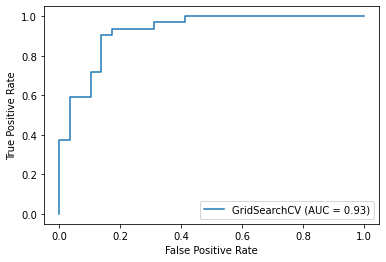

In [48]:
# Нарисуем ROC кривую и посчитаем площадь AUC
plot_roc_curve(gs_log_reg, X_test, y_test);

In [49]:
# Матрица ошибок
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


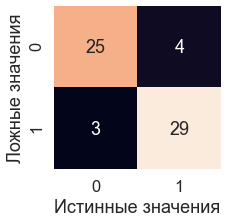

In [50]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Отображает матрицу ошибок при помощи функции heatmap() библиотеки Seaborn
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot = True,
                   cbar = False)
    plt.xlabel("Истинные значения")
    plt.ylabel("Ложные значения")
    
plot_conf_mat(y_test, y_preds)

Теперь когда вывели ROC кривую, нашли площадь под кривой, и вывели матрицу ошибок, выведем отчет о классификации, а тажке кросс-валидированные точность, полноту и F меру

In [51]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [52]:
25/(25+4)

0.8620689655172413

### Рассчитаем метрики при кросс-валидации
Мы рассчитаем точность, полноту F-меру нашей модели при помощи кросс-валидации и для этого будем использовать функию `cross_val_score()`

In [53]:
# Проверим лучшие гиперпараметры

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
# Создадим новый классификатор с лучшими параметрами
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [55]:
# Кросс-валидированная точность
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [57]:
# Кросс-валидированная precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)

cv_precision

0.8207936507936507

In [58]:
# Кроссвалидированная полнота (recall)
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)

cv_recall

0.9212121212121213

In [59]:
# Кроссвалидировання F-мера
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)

cv_f1

0.8673007976269721